# 4. Linear Models for Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear_models import (
    BayesianLogisticRegressor,
    LeastSquaresClassifier,
    LinearDiscriminantAnalyzer,
    LogisticRegressor,
    MultiClassLogisticRegressor)

In [2]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2)
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 4.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

## 4.1.3 Least squares for classification

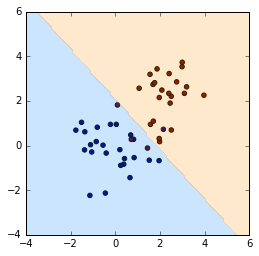

In [3]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

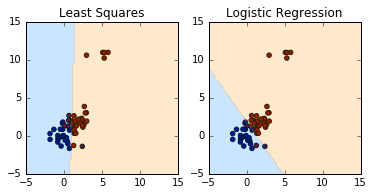

In [4]:
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.predict(X_test)

logistic_regressor = LogisticRegressor()
logistic_regressor.fit(X_train, y_train)
y_lr = logistic_regressor.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

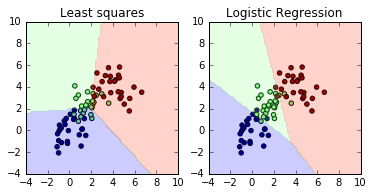

In [5]:
x_train, y_train = create_toy_data(add_class=True)
x1_test, x2_test = np.meshgrid(np.linspace(-4, 10, 100), np.linspace(-4, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.predict(X_test)

logistic_regressor = MultiClassLogisticRegressor()
logistic_regressor.fit(X_train, y_train, 100)
y_lr = logistic_regressor.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-4, 10)
plt.ylim(-4, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-4, 10)
plt.ylim(-4, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

## 4.1.4 Fisher's linear discriminant

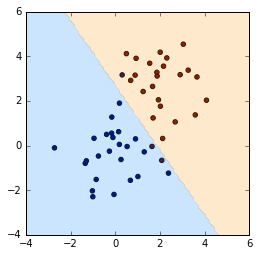

In [6]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

model = LinearDiscriminantAnalyzer()
model.fit(x_train, y_train)
y = model.predict(x_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.3.2 Logistic Regression
Two-class classification

The posterior probability of class $\mathcal{C}_1$ is
$$p(\mathcal{C}_1|{\bf\phi(x)}) = \sigma\left({\bf w}^T{\bf\phi(x)}\right)$$
with $p(\mathcal{C}_0|{\bf\phi(x)}) = 1 - p(\mathcal{C}_1|{\bf\phi(x)})$ and $\sigma(\cdot)$ is logistic sigmoid function.

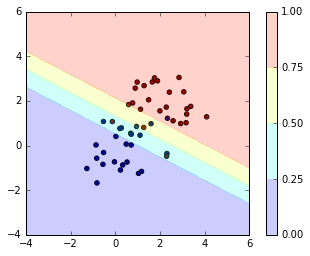

In [7]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LogisticRegressor()
model.fit(X_train, y_train)
y = model.predict_proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.3.4 Multiclass logistic regression

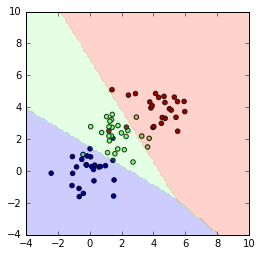

In [8]:
x_train, y_train = create_toy_data(add_class=True)
x1, x2 = np.meshgrid(np.linspace(-4, 10, 100), np.linspace(-4, 10, 100))
x = np.array([x1, x2]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X = feature.transform(x)

model = MultiClassLogisticRegressor()
model.fit(X_train, y_train, iter_max=10000)
y = model.predict(X)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-4, 10)
plt.ylim(-4, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.5 Bayesian Logistic Regression

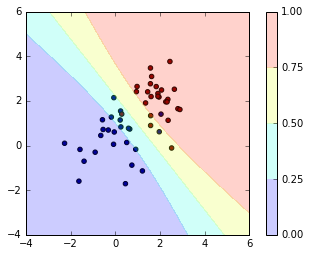

In [9]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-4, 6, 100), np.linspace(-4, 6, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianLogisticRegressor()
model.fit(X_train, y_train)
y = model.predict_proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()